In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import skimage.io

In [2]:
data_folder="/Users/kanhua/Dropbox/Programming/lyft-challenge/data"

In [3]:
test_file=os.path.join(data_folder,"CameraRGB/265.png")
test_file_label=os.path.join(data_folder,"CameraSeg/265.png")

In [4]:
train_image=skimage.io.imread(test_file,format='png')

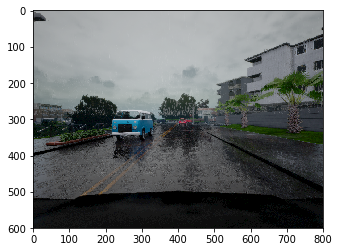

In [5]:
plt.imshow(train_image)

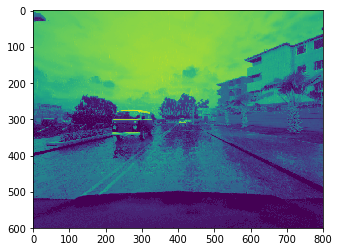

In [6]:
plt.imshow(train_image[:,:,0])

In [7]:
hsv_image=skimage.color.rgb2hsv(train_image)

/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:268: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:274: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:278: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/color/colorconv.py:282: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


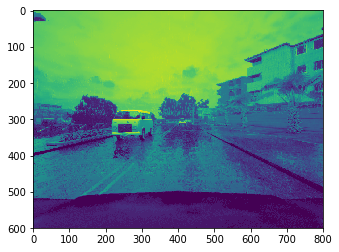

In [8]:
plt.imshow(hsv_image[:,:,2])

(array([108987.,   4754.,  18850.,  10370.,  18104., 231991.,  79815.,
          1148.,   4129.,   1852.]),
 array([0.        , 0.0995098 , 0.19901961, 0.29852941, 0.39803922,
        0.49754902, 0.59705882, 0.69656863, 0.79607843, 0.89558824,
        0.99509804]),
 <a list of 10 Patch objects>)

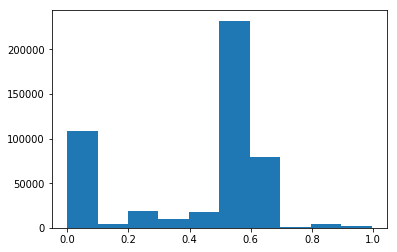

In [9]:
plt.hist(hsv_image[:,:,0].ravel())

In [10]:
hsv_image_shift=np.fmod(hsv_image[:,:,0]+np.random.rand(),1)

In [11]:
hsv_image[:,:,0]=hsv_image_shift

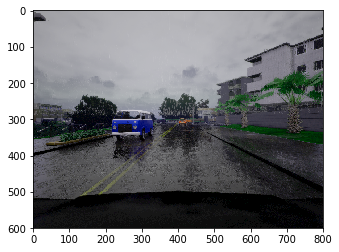

In [12]:
plt.imshow(skimage.color.hsv2rgb(hsv_image))

In [13]:
skimage.color.rgb2hsv([[[0,255,0]]])

/Users/kanhua/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


array([[[3.33333333e-01, 9.98043053e-01, 2.77013655e-17]]])

In [14]:
test_file

'/Users/kanhua/Dropbox/Programming/lyft-challenge/data/CameraRGB/265.png'

## Read data from npy file

In [15]:
full_image_array=np.load("./data/train_data.npy")
full_label_array=np.load("./data/train_label.npy")

In [28]:
image_index=100

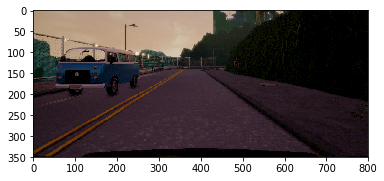

In [29]:
plt.imshow(full_image_array[image_index])

In [30]:
from simdata import shift_hue 

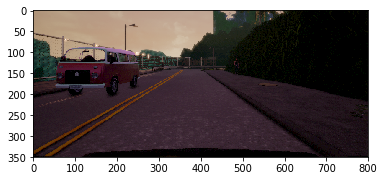

In [31]:
test_image=full_image_array[image_index]
test_label=full_label_array[image_index]
converted_image=shift_hue(test_image,test_label[:,:,2])

plt.imshow(converted_image)

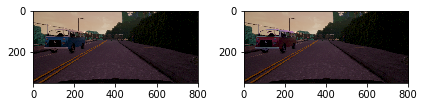

In [34]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(full_image_array[image_index])
ax[1].imshow(converted_image)
fig.tight_layout()
fig.savefig("./docs/shifted_hue_image.png",dpi=150)

## Test batch data

In [ ]:
from simdata import ImageNpy
imgnpy=ImageNpy('./data/train_data.npy','./data/train_label.npy')


In [ ]:
x,y=next(imgnpy.get_bathes_fn_with_crop(5,crop_size=None, shift_hue_prob=0,shuffle=False))

In [ ]:
for xx in x:
    plt.figure()
    plt.imshow(xx)
    